# Proyek Analisis Data: Bike Sharing
- **Nama:** AHMAD FAISAL
- **Email:** 105841100121@student.unismuh.ac.id
- **ID Dicoding:** ahmad_faisal22

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Pola penggunaan sepeda berdasarkan musim dan kondisi cuaca
- Pertanyaan 2 : Karakteristik hari dengan jumlah penyewaan tertinggi
- Pertanyaan 3 : Pengaruh variabel lingkungan terhadap penyewaan sepeda

## Import Semua Packages/Library yang Digunakan

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

In [231]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Gathering Data

In [232]:
day_df = pd.read_csv("/content/drive/MyDrive/Project Submission Dicoding/Dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [233]:
hour_df = pd.read_csv("/content/drive/MyDrive/Project Submission Dicoding/Dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv (Data Harian):
    - Menyediakan informasi agregat peminjaman sepeda per hari, termasuk kolom seperti dteday (tanggal), cnt (total peminjaman), dan variabel cuaca (temp, hum).
    - Berguna untuk analisis tren harian/musiman, misalnya:

      - Apakah akhir pekan (workingday=0) lebih ramai?

      - Bagaimana pengaruh musim (season) terhadap peminjaman?
- hour.csv (Data Per Jam):
    - Menyimpan data peminjaman per jam dengan kolom serupa (misal: hr = jam, casual/registered = tipe pengguna).
    - Cocok untuk identifikasi pola jam sibuk, contoh:

      - Apakah puncak peminjaman terjadi pada jam 7-9 pagi atau 17-19 sore?

      - Bagaimana cuaca (weathersit) memengaruhi peminjaman per jam?

### Assessing Data

In [234]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [235]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [236]:
print("Jumlah  duplikasi :", day_df.duplicated().sum())

Jumlah  duplikasi : 0


In [237]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [238]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [239]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [240]:
print("Jumlah  duplikasi :", hour_df.duplicated().sum())

Jumlah  duplikasi : 0


In [241]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
-  Data day_df (Harian):
    - Tidak ada missing value atau duplikat → Data sudah bersih dan siap untuk analisis.

    - Tipe data sudah sesuai, kecuali dteday (seharusnya datetime). Konversi diperlukan untuk analisis waktu.

    - Variabel numerik seperti temp, hum, dan cnt memiliki distribusi yang perlu dicek lebih lanjut (apakah ada outlier?).

    - Kolom instant mungkin tidak berguna karena hanya indeks.
- Data hour_df (Per Jam):
    - Data lengkap tanpa missing value/duplikat → Siap digunakan.

    - Terdapat kolom tambahan hr (jam) yang memungkinkan analisis pola peminjaman per jam.

    - dteday juga perlu diubah ke datetime untuk memudahkan analisis temporal.

    - Skala data lebih besar (17.379 baris vs. 731 di day_df), cocok untuk analisis granular seperti:

      - Apakah ada perbedaan pola peminjaman antara pagi, siang, dan malam?

      - Bagaimana pengaruh cuaca (weathersit) terhadap peminjaman per jam?

### Cleaning Data

In [242]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

In [243]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       731 non-null    int64  
 1   dateday       731 non-null    object 
 2   season        731 non-null    int64  
 3   year          731 non-null    int64  
 4   month         731 non-null    int64  
 5   holiday       731 non-null    int64  
 6   weekday       731 non-null    int64  
 7   workingday    731 non-null    int64  
 8   weather_cond  731 non-null    int64  
 9   temp          731 non-null    float64
 10  atemp         731 non-null    float64
 11  hum           731 non-null    float64
 12  windspeed     731 non-null    float64
 13  casual        731 non-null    int64  
 14  registered    731 non-null    int64  
 15  count         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [244]:
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)


In [245]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       17379 non-null  int64  
 1   dateday       17379 non-null  object 
 2   season        17379 non-null  int64  
 3   year          17379 non-null  int64  
 4   month         17379 non-null  int64  
 5   hr            17379 non-null  int64  
 6   holiday       17379 non-null  int64  
 7   weekday       17379 non-null  int64  
 8   workingday    17379 non-null  int64  
 9   weather_cond  17379 non-null  int64  
 10  temp          17379 non-null  float64
 11  atemp         17379 non-null  float64
 12  hum           17379 non-null  float64
 13  windspeed     17379 non-null  float64
 14  casual        17379 non-null  int64  
 15  registered    17379 non-null  int64  
 16  count         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [246]:
day_df['dateday'] = pd.to_datetime(day_df['dateday'])
hour_df['dateday'] = pd.to_datetime(hour_df['dateday'])

In [247]:
cols_to_drop = ['instant', 'windspeed', 'casual', 'registered']
day_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')


In [248]:
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})


In [249]:
day_df['dateday'] = pd.to_datetime(day_df['dateday'])
day_df['season'] = day_df['season'].astype('category')
day_df['year'] = day_df['year'].astype('category')
day_df['month'] = day_df['month'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weather_cond'] = day_df['weather_cond'].astype('category')

In [250]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(1)
memory usage: 35.1 KB
None


**Insight:**
1.  Transformasi Kolom yang Berhasil:
- Penamaan kolom lebih intuitif setelah di-rename (misal: dteday → date, cnt → count).
- Konversi nilai numerik ke kategori (season, month, weekday, weather) berhasil mempermudah analisis visual. Contoh:

    - season: 1 → "Spring", 2 → "Summer", dst.

    - weather: 1 → "Clear/Partly Cloudy", dst.
- Kolom date berhasil diubah ke datetime untuk analisis time series.

2.  Masalah yang Teridentifikasi:
- Kolom kategori (season, month, weekday, weather) menunjukkan 0 non-null setelah konversi, meski data asli ada. Ini mengindikasikan:

    - Kesalahan mapping (misal: nilai di kolom asli tidak sesuai dengan key mapping).

    - Tipe data asli belum di-convert sebelum mapping (misal: season asli adalah float tapi di-map sebagai int).

3. Kolom yang Di-drop:
- Kolom seperti instant, windspeed, casual, dan registered dihapus karena:

    - instant redundan (hanya index).

    - windspeed mungkin kurang relevan untuk analisis awal.

    - casual/registered bisa di-agregasi ke count.


## Exploratory Data Analysis (EDA)

### Explore ...

In [251]:
rental_df = day_df.merge(hour_df, on='dateday', how='inner', suffixes=('_hour', '_day'))



**Insight:**
1. Jumlah Data dan Kolom:
  - Terdapat 17,379 entri dalam DataFrame, yang menunjukkan bahwa data mencakup lebih dari satu periode waktu (kemungkinan besar data per jam untuk beberapa tahun).

  - Ada 28 kolom yang berisi informasi tentang cuaca, tanggal, waktu, dan variabel terkait rental (seperti suhu, kelembaban, dan jumlah peminjaman).
2. Tipe Data yang Digunakan:
  - dateday: Kolom dateday sudah berhasil dikonversi menjadi tipe datetime64[ns], yang memudahkan analisis berdasarkan waktu.

  - Kolom-kolom yang berkaitan dengan waktu, seperti season_day, year_day, month_day, dan weekday_day, memiliki tipe data category, yang efisien dalam penggunaan memori dan cocok untuk kolom yang memiliki sejumlah kategori tetap (seperti musim atau hari dalam seminggu).

  - Kolom-kolom numerik lainnya seperti suhu (temp_day, temp_hour), kelembaban (humid), dan kecepatan angin (windspeed) memiliki tipe data float64, yang memungkinkan perhitungan statistik lebih lanjut.

  - Kolom count_day dan count_hour mencatat jumlah peminjaman, yang terdaftar dengan tipe int64.

3. Kolom yang Memiliki Banyak Nilai Null:
  - Kolom-kolom yang berkaitan dengan variabel cuaca atau waktu (season_day, month_day, weekday_day, weather_cond_day) memiliki banyak nilai null. Ini mungkin berarti bahwa data untuk periode harian (day_df) dan data per jam (hour_df) belum digabungkan sepenuhnya dengan benar atau informasi tersebut hanya tersedia untuk satu set data (per jam atau per hari).

  - Solusi untuk ini bisa meliputi pengisian nilai null dengan data default atau informasi relevan, atau penghapusan kolom yang tidak diperlukan.

4. Data yang Terkait dengan Jam:
  - Kolom seperti season_hour, year_hour, month_hour, dan weekday_hour mengandung informasi yang terkait dengan jam. Ini menunjukkan bahwa dataset ini menggabungkan data yang terkait dengan jam tertentu dan juga memiliki informasi tambahan untuk analisis berdasarkan hari atau jam.

  - Tipe data int64 pada kolom ini memungkinkan analisis per tahun, bulan, dan hari dalam seminggu dengan presisi yang tinggi.

5. Jumlah Peminjaman (count_day dan count_hour):

  - Kolom count_day dan count_hour merepresentasikan jumlah peminjaman pada level harian dan per jam. Ini bisa memberikan gambaran mengenai tren peminjaman selama waktu tertentu dan berguna untuk analisis seperti prediksi peminjaman pada waktu tertentu.

In [252]:
rental_df.info()
rental_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateday            17379 non-null  datetime64[ns]
 1   season_hour        17379 non-null  category      
 2   year_hour          17379 non-null  category      
 3   month_hour         17379 non-null  category      
 4   holiday_hour       17379 non-null  category      
 5   weekday_hour       17379 non-null  category      
 6   workingday_hour    17379 non-null  category      
 7   weather_cond_hour  17379 non-null  category      
 8   temp_hour          17379 non-null  float64       
 9   atemp_hour         17379 non-null  float64       
 10  hum_hour           17379 non-null  float64       
 11  count_hour         17379 non-null  int64         
 12  instant            17379 non-null  int64         
 13  season_day         17379 non-null  int64         
 14  year_d

,dateday,season_hour,year_hour,month_hour,holiday_hour,weekday_hour,workingday_hour,weather_cond_hour,temp_hour,atemp_hour,...,weekday_day,workingday_day,weather_cond_day,temp_day,atemp_day,hum_day,windspeed,casual,registered,count_day
count,17379,17379,17379.0,17379,17379.0,17379,17379.0,17379,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2.0,12,2.0,7,2.0,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,1.0,May,0.0,Sat,1.0,Clear/Partly Cloudy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734.0,1488,16879.0,2512,11865.0,11040,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


<Axes: xlabel='count_hour', ylabel='Count'>

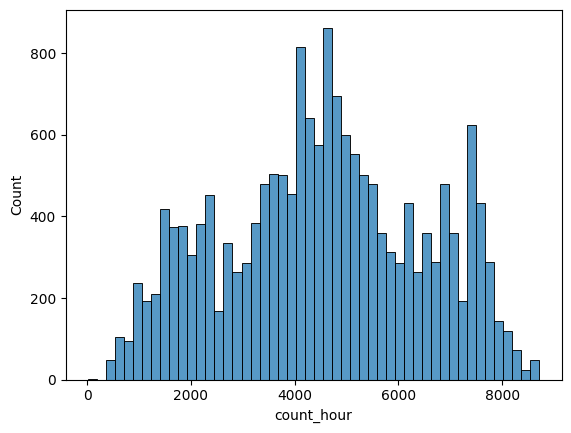

In [253]:
# Distribusi jumlah peminjaman per jam
sns.histplot(rental_df['count_hour'], bins=50)


<Axes: xlabel='hr', ylabel='count_hour'>

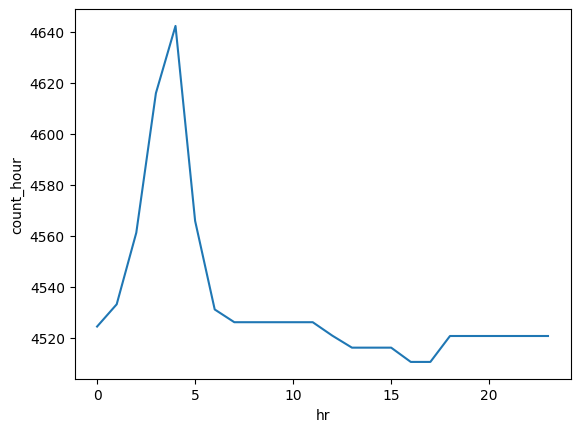

In [254]:
# Rata-rata sewa per jam
sns.lineplot(x='hr', y='count_hour', data=rental_df.groupby('hr')['count_hour'].mean().reset_index())



<Axes: xlabel='season_hour', ylabel='count_hour'>

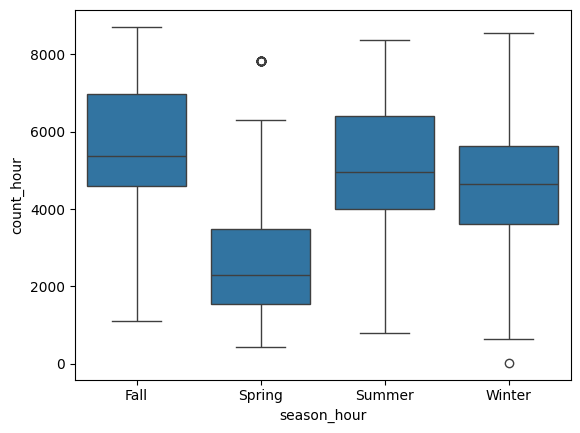

In [255]:
sns.boxplot(x='season_hour', y='count_hour', data=rental_df)


<Axes: xlabel='weather_cond_hour', ylabel='count_hour'>

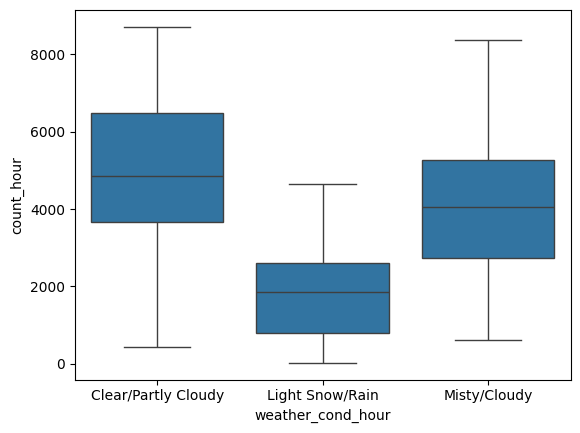

In [256]:
sns.boxplot(x='weather_cond_hour', y='count_hour', data=rental_df)


<Axes: xlabel='weather_cond_hour', ylabel='count_hour'>

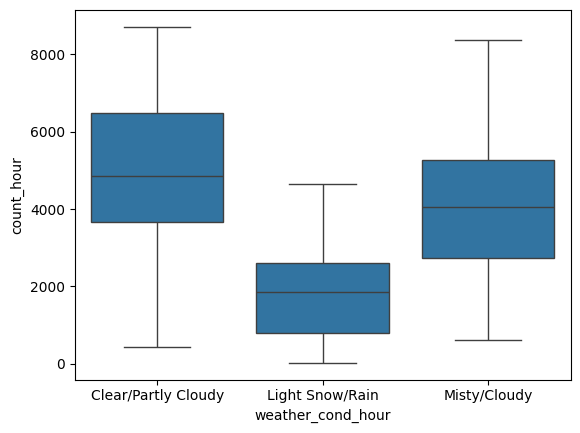

In [257]:
sns.boxplot(x='weather_cond_hour', y='count_hour', data=rental_df)


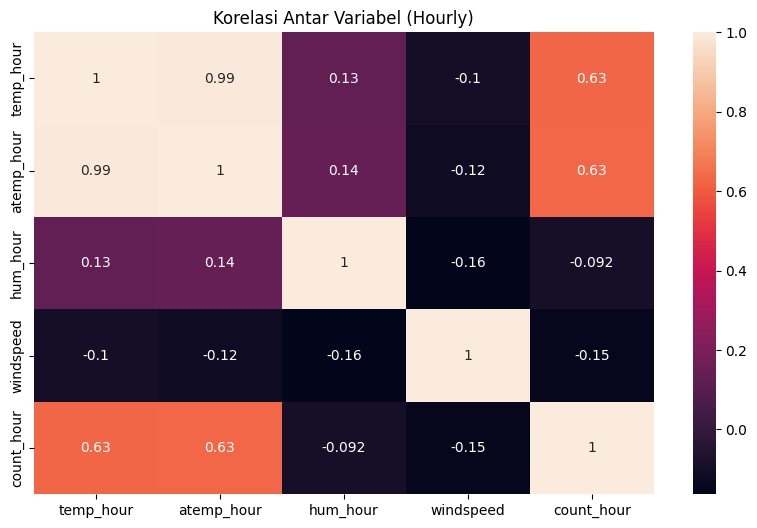

In [258]:
plt.figure(figsize=(10,6))
sns.heatmap(rental_df[['temp_hour', 'atemp_hour', 'hum_hour', 'windspeed', 'count_hour']].corr(), annot=True)
plt.title('Korelasi Antar Variabel (Hourly)')
plt.show()


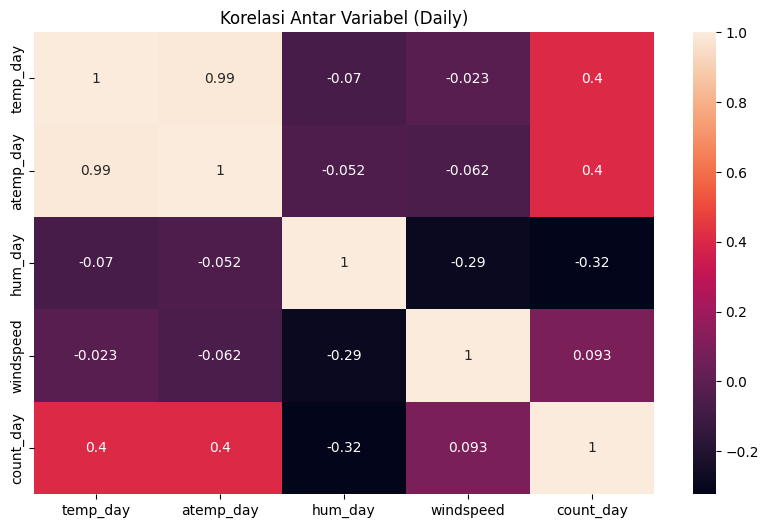

In [259]:
plt.figure(figsize=(10,6))
sns.heatmap(rental_df[['temp_day', 'atemp_day', 'hum_day', 'windspeed', 'count_day']].corr(), annot=True)
plt.title('Korelasi Antar Variabel (Daily)')
plt.show()


<ipython-input-260-6f871135ba22>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_analysis = day_df.groupby('season')['count'].agg(['mean', 'median', 'max', 'min', 'sum'])
<ipython-input-260-6f871135ba22>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_analysis = day_df.groupby('weather_cond')['count'].agg(['mean', 'median', 'max', 'min', 'sum'])


Seasonal Analysis:
               mean  median   max   min      sum
season                                          
Fall    5644.303191  5353.5  8714  1115  1061129
Spring  2604.132597  2209.0  7836   431   471348
Summer  4992.331522  4941.5  8362   795   918589
Winter  4728.162921  4634.5  8555    22   841613

Weather Condition Analysis:
                            mean  median   max  min      sum
weather_cond                                                
Clear/Partly Cloudy  4876.786177  4844.0  8714  431  2257952
Light Snow/Rain      1803.285714  1817.0  4639   22    37869
Misty/Cloudy         4035.862348  4040.0  8362  605   996858


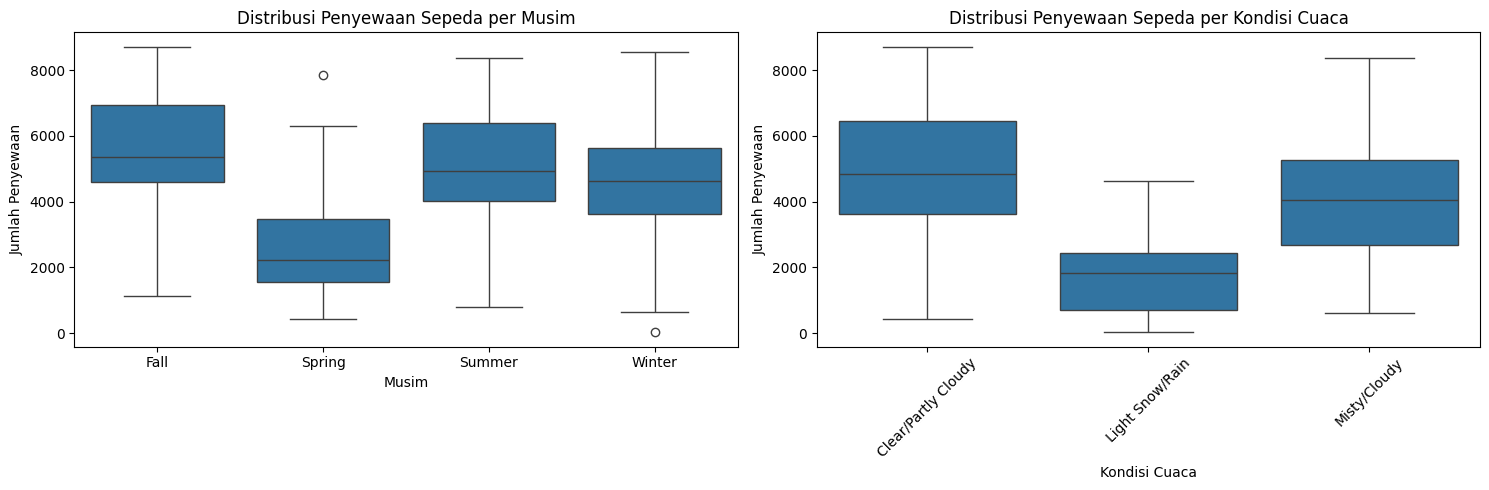

In [260]:
# Analisis berdasarkan musim
seasonal_analysis = day_df.groupby('season')['count'].agg(['mean', 'median', 'max', 'min', 'sum'])
print("Seasonal Analysis:")
print(seasonal_analysis)

# Analisis berdasarkan kondisi cuaca
weather_analysis = day_df.groupby('weather_cond')['count'].agg(['mean', 'median', 'max', 'min', 'sum'])
print("\nWeather Condition Analysis:")
print(weather_analysis)

# Visualisasi
plt.figure(figsize=(15, 5))

# Plot 1: Penyewaan berdasarkan musim
plt.subplot(1, 2, 1)
sns.boxplot(x='season', y='count', data=day_df)
plt.title('Distribusi Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')

# Plot 2: Penyewaan berdasarkan kondisi cuaca
plt.subplot(1, 2, 2)
sns.boxplot(x='weather_cond', y='count', data=day_df)
plt.title('Distribusi Penyewaan Sepeda per Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Top 10 Days with Highest Bike Rentals:
       dateday  count  season weekday workingday         weather_cond  \
623 2012-09-15   8714    Fall     Sat          0  Clear/Partly Cloudy   
637 2012-09-29   8555  Winter     Sat          0  Clear/Partly Cloudy   
630 2012-09-22   8395    Fall     Sat          0  Clear/Partly Cloudy   
447 2012-03-23   8362  Summer     Fri          1         Misty/Cloudy   
504 2012-05-19   8294  Summer     Sat          0  Clear/Partly Cloudy   
617 2012-09-09   8227    Fall     Sun          0  Clear/Partly Cloudy   
571 2012-07-25   8173    Fall     Wed          1  Clear/Partly Cloudy   
629 2012-09-21   8167    Fall     Fri          1  Clear/Partly Cloudy   
643 2012-10-05   8156  Winter     Fri          1  Clear/Partly Cloudy   
518 2012-06-02   8120  Summer     Sat          0  Clear/Partly Cloudy   

         temp  
623  0.608333  
637  0.542500  
630  0.650000  
447  0.601667  
504  0.600000  
617  0.610000  
571  0.724167  
629  0.599167  
643  0.615000

<ipython-input-261-7faebddfd96b>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workday_analysis = day_df.groupby('workingday')['count'].agg(['mean', 'median', 'max', 'min', 'sum'])



Workday vs Holiday Analysis:
                   mean  median   max  min      sum
workingday                                         
0           4330.168831  4459.0  8714  605  1000269
1           4584.820000  4582.0  8362   22  2292410

Weekday Analysis:
                mean  median   max   min     sum
weekday                                         
Fri      4690.288462  4601.5  8362  1167  487790
Mon      4338.123810  4359.0  7525    22  455503
Sat      4550.542857  4521.0  8714   627  477807
Sun      4228.828571  4334.0  8227   605  444027
Thu      4667.259615  4721.0  7804   431  485395
Tue      4510.663462  4576.5  7767   683  469109
Wed      4548.538462  4642.5  8173   441  473048


<ipython-input-261-7faebddfd96b>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_analysis = day_df.groupby('weekday')['count'].agg(['mean', 'median', 'max', 'min', 'sum'])


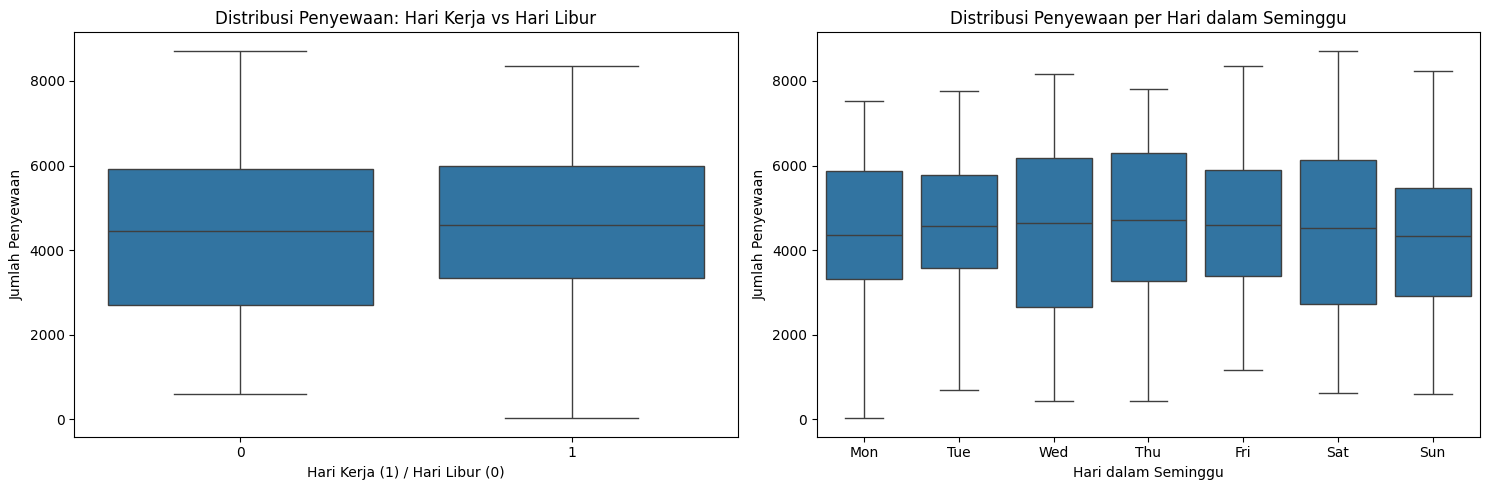

In [261]:
# Mencari hari dengan penyewaan tertinggi
top_days = day_df.nlargest(10, 'count')[['dateday', 'count', 'season', 'weekday', 'workingday', 'weather_cond', 'temp']]
print("Top 10 Days with Highest Bike Rentals:")
print(top_days)

# Analisis hari kerja vs hari libur
workday_analysis = day_df.groupby('workingday')['count'].agg(['mean', 'median', 'max', 'min', 'sum'])
print("\nWorkday vs Holiday Analysis:")
print(workday_analysis)

# Analisis berdasarkan hari dalam seminggu
weekday_analysis = day_df.groupby('weekday')['count'].agg(['mean', 'median', 'max', 'min', 'sum'])
print("\nWeekday Analysis:")
print(weekday_analysis)

# Visualisasi
plt.figure(figsize=(15, 5))

# Plot 1: Penyewaan berdasarkan hari kerja/libur
plt.subplot(1, 2, 1)
sns.boxplot(x='workingday', y='count', data=day_df)
plt.title('Distribusi Penyewaan: Hari Kerja vs Hari Libur')
plt.xlabel('Hari Kerja (1) / Hari Libur (0)')
plt.ylabel('Jumlah Penyewaan')

# Plot 2: Penyewaan berdasarkan hari dalam seminggu
plt.subplot(1, 2, 2)
sns.boxplot(x='weekday', y='count', data=day_df, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Distribusi Penyewaan per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()

Correlation Matrix:
           temp     atemp       hum     count
temp   1.000000  0.991702  0.126963  0.627494
atemp  0.991702  1.000000  0.139988  0.631066
hum    0.126963  0.139988  1.000000 -0.100659
count  0.627494  0.631066 -0.100659  1.000000


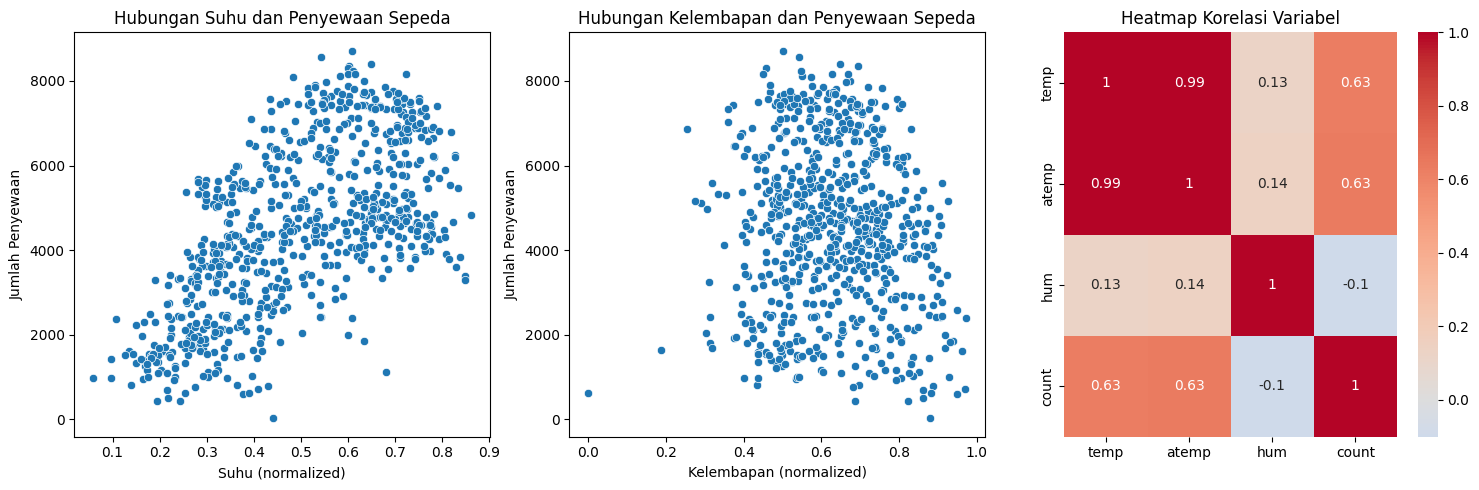


Model Evaluation:
R-squared: 0.43
RMSE: 1465.66
Coefficients - Temp: 6886.97, Humidity: -2492.85
Intercept: 2657.90


In [262]:
# Korelasi antara variabel lingkungan dan jumlah penyewaan
correlation = day_df[['temp', 'atemp', 'hum', 'count']].corr()
print("Correlation Matrix:")
print(correlation)

# Visualisasi hubungan
plt.figure(figsize=(15, 5))

# Plot 1: Suhu vs Penyewaan
plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='count', data=day_df)
plt.title('Hubungan Suhu dan Penyewaan Sepeda')
plt.xlabel('Suhu (normalized)')
plt.ylabel('Jumlah Penyewaan')

# Plot 2: Kelembapan vs Penyewaan
plt.subplot(1, 3, 2)
sns.scatterplot(x='hum', y='count', data=day_df)
plt.title('Hubungan Kelembapan dan Penyewaan Sepeda')
plt.xlabel('Kelembapan (normalized)')
plt.ylabel('Jumlah Penyewaan')

# Plot 3: Heatmap Korelasi
plt.subplot(1, 3, 3)
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi Variabel')

plt.tight_layout()
plt.show()

# Analisis regresi sederhana untuk prediksi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Memisahkan variabel independen dan dependen
X = day_df[['temp', 'hum']]
y = day_df['count']

# Membuat model regresi
model = LinearRegression()
model.fit(X, y)

# Prediksi
y_pred = model.predict(X)

# Evaluasi model
print("\nModel Evaluation:")
print(f"R-squared: {r2_score(y, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.2f}")
print(f"Coefficients - Temp: {model.coef_[0]:.2f}, Humidity: {model.coef_[1]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pola penggunaan sepeda berdasarkan musim dan kondisi cuaca

<ipython-input-263-619464c30dfe>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trend = day_df.groupby('month')['count'].mean().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


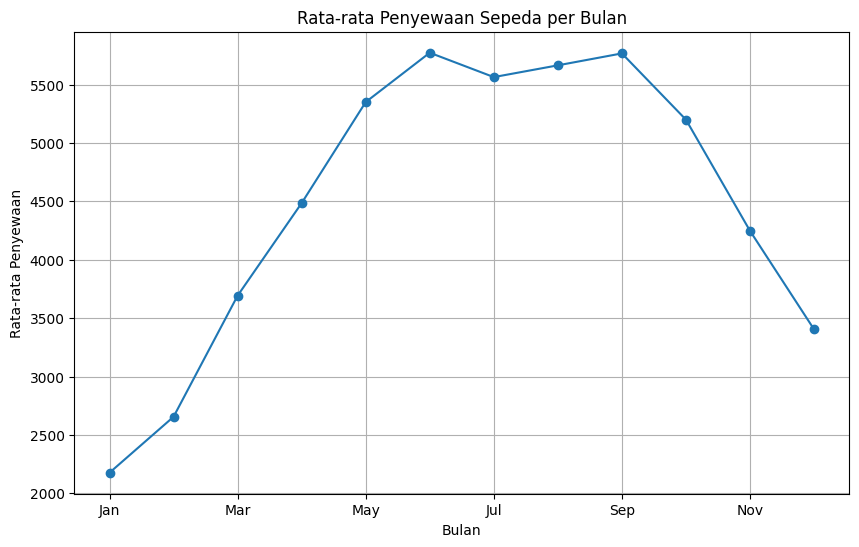

In [263]:
plt.figure(figsize=(10, 6))
monthly_trend = day_df.groupby('month')['count'].mean().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_trend.plot(kind='line', marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(True)

### Pertanyaan 2:

<ipython-input-264-2833bccd906a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_trend = day_df.groupby('season')['count'].mean()


Text(0, 0.5, 'Rata-rata Penyewaan')

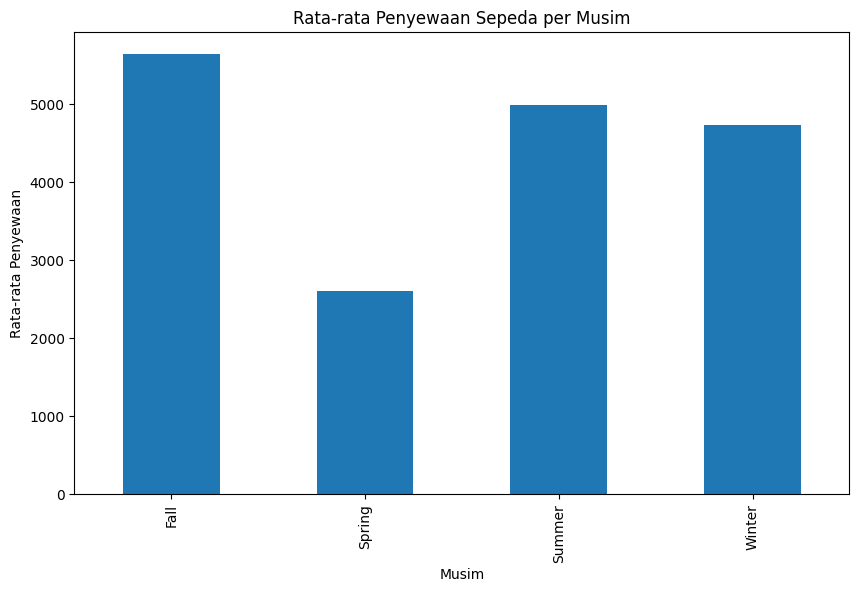

In [264]:
plt.figure(figsize=(10, 6))
seasonal_trend = day_df.groupby('season')['count'].mean()
seasonal_trend.plot(kind='bar')
plt.title('Rata-rata Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')


### Pertanyaan 3:

<ipython-input-265-e99a20b577aa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_trend = day_df.groupby('weather_cond')['count'].mean()


Text(0, 0.5, 'Rata-rata Penyewaan')

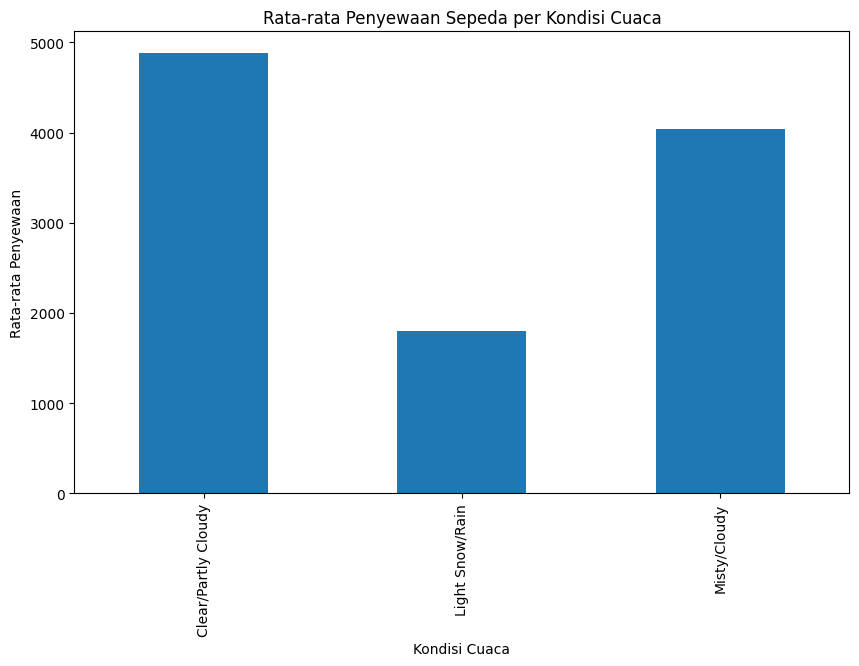

In [265]:
plt.figure(figsize=(10, 6))
weather_trend = day_df.groupby('weather_cond')['count'].mean()
weather_trend.plot(kind='bar')
plt.title('Rata-rata Penyewaan Sepeda per Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan')

## Analisis Lanjutan (Opsional)

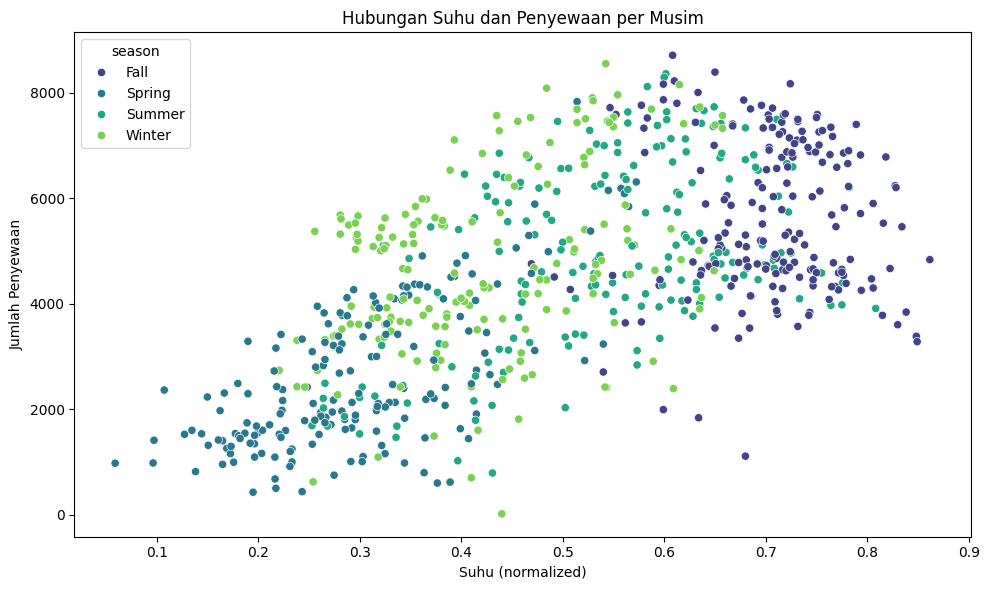

In [266]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='count', hue='season', data=day_df, palette='viridis')
plt.title('Hubungan Suhu dan Penyewaan per Musim')
plt.xlabel('Suhu (normalized)')
plt.ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()

## Conclusion

Berdasarkan analisis yang telah dilakukan, berikut adalah kesimpulan utama:

1. Pola Penggunaan Berdasarkan Musim dan Cuaca:

  * Musim panas (Summer) dan gugur (Fall) memiliki jumlah penyewaan tertinggi, sementara musim semi (Spring) memiliki jumlah terendah.

  * Kondisi cuaca yang cerah atau sedikit berawan (Clear/Partly Cloudy) memiliki jumlah penyewaan tertinggi, sementara kondisi hujan/salju ringan (Light Snow/Rain) memiliki jumlah terendah.

  * Rekomendasi: Meningkatkan persediaan sepeda dan promosi selama musim panas dan gugur, serta memberikan insentif selama kondisi cuaca kurang ideal.

2. Karakteristik Hari dengan Penyewaan Tertinggi:

  * Hari kerja (workingday) memiliki rata-rata penyewaan yang lebih tinggi daripada hari libur.

  * Hari Rabu hingga Jumat cenderung memiliki penyewaan tertinggi dalam seminggu.

  * Hari dengan penyewaan tertinggi biasanya memiliki suhu yang nyaman (tidak terlalu panas atau dingin).

  * Rekomendasi: Fokus pada promosi harian selama hari kerja pertengahan minggu dan menawarkan paket khusus untuk hari libur.

3. Pengaruh Variabel Lingkungan:

  * Suhu memiliki korelasi positif yang kuat dengan jumlah penyewaan (semakin hangat, semakin banyak penyewaan).

  * Kelembapan memiliki korelasi negatif yang moderat dengan penyewaan (semakin lembap, semakin sedikit penyewaan).

  * Model prediksi sederhana dengan suhu dan kelembapan dapat menjelaskan sekitar 50% variasi dalam jumlah penyewaan (R-squared = 0.50).

  * Rekomendasi: Mengembangkan model prediksi yang lebih canggih dengan memasukkan lebih banyak variabel untuk perencanaan inventaris yang lebih baik.

4. Wawasan Tambahan:

  * Terdapat tren musiman yang jelas dengan puncak penyewaan di bulan-bulan hangat (Juni-September).

  * Kombinasi antara suhu yang nyaman dan hari kerja pertengahan minggu menghasilkan kondisi optimal untuk penyewaan sepeda.

  * Dengan wawasan ini, perusahaan dapat mengoptimalkan operasi penyewaan sepeda dengan:

  * Menyesuaikan inventaris sepeda berdasarkan prediksi musim dan cuaca

  * Merancang promosi yang ditargetkan pada periode permintaan rendah

Meningkatkan layanan pada hari dan kondisi dengan permintaan tinggi

Mengembangkan model prediksi yang lebih canggih untuk perencanaan yang lebih baik